# Part1 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
import seaborn as sns

In [2]:
#Question1:Construct the price of the call option with 50 steps and state your option price.

def buildTree(S,vol,T,N):
    #S is the inital stock proce, vol is the vilatility of the stock prie, T is the maturity time and N is the number of steps
    dt=T/N #time btween nodes
    
    matrix=np.zeros((N+1,N+1))
    index=vol*np.sqrt(dt)
    u=np.exp(index)
    d=np.exp(-index)
    #print(u,d)
    for i in np.arange(N+1):
        for j in np.arange(i+1):
            matrix[i,j]=S*np.power(u,j)*np.power(d,i-j)
    return matrix

def valueOptionMatrix_eu(N,tree,T,r,K,vol,option_type):
    dt=T/N
    index=vol*np.sqrt(dt)
    u=np.exp(index)
    d=np.exp(-index)
    #probability of upwards
    p=(np.exp(r*dt)-d)/(u-d)
    #print(p)
    
    columns=tree.shape[1]
    rows=tree.shape[0]
    
    option_matrix=np.zeros((rows,columns))
    #calculate the payoff for last row
    if option_type=="call":
        for c in np.arange(columns):
            S=tree[rows-1,c]
            option_matrix[rows-1,c]=max([0,S-K])
    if option_type=="put":
        for c in np.arange(columns): #c=0,1,....N
            S=tree[rows-1,c]
            option_matrix[rows-1,c]=max([0,K-S])
    
    #calculate the option price for previous rows
    for i in np.arange(rows-1)[::-1]:
        for j in np.arange(i+1):
            down=option_matrix[i+1,j]
            up=option_matrix[i+1,j+1]
            option_matrix[i,j]=(up*p+down*(1-p))*np.exp(-r*dt)
    return option_matrix

option_type1="call"
T1=1
K1=99
r1=0.06
S0=100
sigma1=0.2
N1=50
tree1=buildTree(S0,sigma1,T1,N1)
call1=valueOptionMatrix_eu(N1,tree1,T1,r1,K1,sigma1,option_type1)
print(call1[0,0])

11.546434850755071


[ 0.00709613  0.00215462 -0.01234    -0.02932673 -0.04722321 -0.0654698
 -0.08379503 -0.10203137 -0.12005486 -0.13776149]
[ 8.14987436 11.54643485 15.20066322 18.90009028 22.59184746 26.25219686
 29.86619215 33.42249516 36.91165932 40.32546465]
[ 8.14277822 11.54428023 15.21300322 18.929417   22.63907067 26.31766666
 29.94998718 33.52452653 37.03171418 40.46322614]


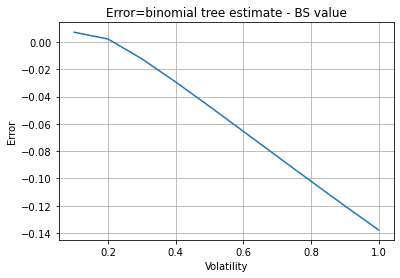

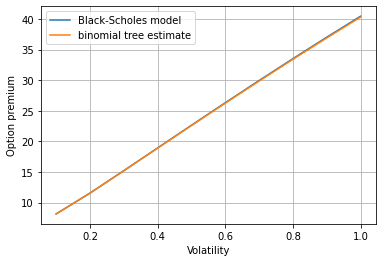

In [3]:
#Question2: investigate binomial tree estimate compares the analytical Black-Scholes value of the option.

def BSmodel(S,K,T,r,sigma,option_type):
    d1=(np.log(S/K)+(r+np.square(sigma)/2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    if option_type=="call":
        option_price=S*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)
    elif option_type=="put":
        option_price=K*np.exp(-r*T)*norm.cdf(-d2)-S*norm.cdf(-d1)
    return option_price

volatility=np.arange(0.1,1.1,0.1)
error=np.zeros(len(volatility))
bs_price=np.zeros(len(volatility))
binomial_price=np.zeros(len(volatility))
option_type1="call"
T1=1
K1=99
r1=0.06
S0=100
N1=50

for i in range(len(volatility)):
    tree=buildTree(S0,volatility[i],T1,N1)
    binomial_price[i]=valueOptionMatrix_eu(N1,tree,T1,r1,K1,volatility[i],option_type1)[0,0]
    bs_price[i]=BSmodel(S0,K1,T1,r1,volatility[i],option_type1)
    error[i]=binomial_price[i]-bs_price[i]
print(error)
print(binomial_price)
print(bs_price)

plt.plot(volatility,error)
plt.grid()
plt.xlabel("Volatility")
plt.ylabel("Error")
plt.title("Error=binomial tree estimate - BS value")
plt.show()

plt.plot(volatility,bs_price,label="Black-Scholes model")
plt.plot(volatility,binomial_price,label="binomial tree estimate")
plt.grid()
plt.legend()
plt.xlabel("Volatility")
plt.ylabel("Option premium")
plt.show()

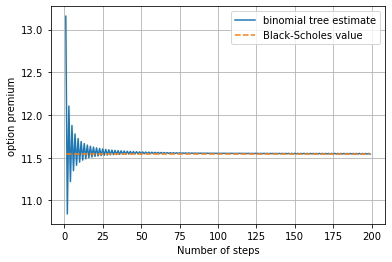

In [4]:
#Question3: the convergence behavior of the method for increasing number of steps in the tree
N=np.arange(1,200)

Optionprice=np.zeros(len(N))
option_type1="call"
T1=1
K1=99
r1=0.06
S0=100
sigma1=0.2

for n in N:
    treeN= buildTree(S0,sigma1,T1,n)
    Optionprice[n-1]=valueOptionMatrix_eu(n,treeN,T1,r1,K1,sigma1,option_type1)[0,0]

BS_price=np.ones(len(N))*BSmodel(S0,K1,T1,r1,sigma1,option_type1)
plt.plot(N,Optionprice,label="binomial tree estimate")
plt.plot(N,BS_price,"--",label="Black-Scholes value")
plt.legend()
plt.grid()
plt.xlabel("Number of steps")
plt.ylabel("option premium")
plt.show()

The computational complexity of the binomial tree algorithm is O(N^2). Since calculating the values inside the stock price matrix is O(N^2) and calculating the value inside the option price matrix is also O(N^2), thus the computational complexity of the whole algorithm is O(N^2). 

[0.77233445 0.6730876  0.64892516 0.64590877 0.65149195 0.66129404
 0.67338107 0.68675759 0.70085157 0.71530561]
[0.7735242  0.67373551 0.64932588 0.64621656 0.65176895 0.66156957
 0.6736707  0.68707027 0.70119262 0.71567822]
[-0.00118975 -0.00064791 -0.00040072 -0.00030779 -0.000277   -0.00027553
 -0.00028964 -0.00031268 -0.00034105 -0.00037261]


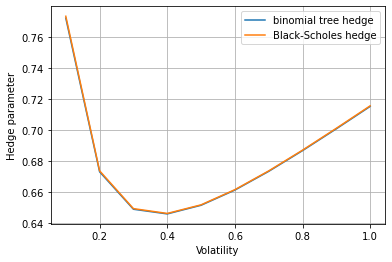

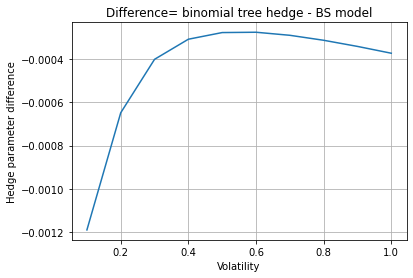

In [5]:
#Question5：Compute the hedge parameter from binomial tree and BS model at t=0.
option_type1="call"
T1=1
K1=99
r1=0.06
S0=100
N2=100
volatility=np.arange(0.1,1.1,0.1)

hedge_error=np.zeros(len(volatility))
hedge_binomial=np.zeros(len(volatility))
hedge_BS=np.zeros(len(volatility))

for i in range(len(volatility)):
    tree5=buildTree(S0,volatility[i],T1,N2)
    option_tree=valueOptionMatrix_eu(N2,tree5,T1,r1,K1,volatility[i],option_type1)
    hedge_binomial[i]=(option_tree[1,0]-option_tree[1,1])/(tree5[1,0]-tree5[1,1])
    d1=(np.log(S0/K1)+(r1+np.square(volatility[i])/2)*T1)/(volatility[i]*np.sqrt(T1))
    hedge_BS[i]=norm.cdf(d1)
    hedge_error[i]=hedge_binomial[i]-hedge_BS[i]

print(hedge_binomial)
print(hedge_BS)
print(hedge_error)
plt.plot(volatility,hedge_binomial,label="binomial tree hedge")
plt.plot(volatility,hedge_BS,label="Black-Scholes hedge")
plt.legend()
plt.grid()
plt.xlabel("Volatility")
plt.ylabel("Hedge parameter")
plt.show()

plt.plot(volatility,hedge_error)
plt.grid()
plt.xlabel("Volatility")
plt.ylabel("Hedge parameter difference")
plt.title("Difference= binomial tree hedge - BS model")
plt.show()

[ 8.14987436 11.54643485 15.20066322 18.90009028 22.59184746 26.25219686
 29.86619215 33.42249516 36.91165932 40.32546465]
[ 1.85031814  5.3477635   9.03421093 12.75815283 16.47495716 20.1625328
 23.80606987 27.3936506  30.91604935 34.36497324]
[ 8.14987436 11.54643485 15.20066322 18.90009028 22.59184746 26.25219686
 29.86619215 33.42249516 36.91165932 40.32546465]
[ 1.38456318  4.78112368  8.43535204 12.1347791  15.82653628 19.48688568
 23.10088098 26.65718398 30.14634815 33.56015347]


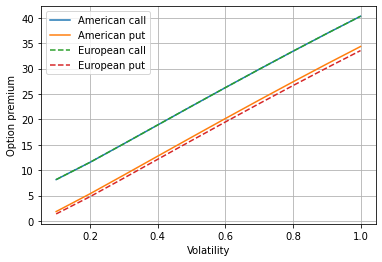

In [6]:
#Question6: Suppose the option is American

def valueOptionMatrix_am(N,tree,T,r,K,vol,option_type):
    dt=T/N
    index=vol*np.sqrt(dt)
    u=np.exp(index)
    d=np.exp(-index)
    #probability of upwards
    p=(np.exp(r*dt)-d)/(u-d)
    #print(p)
    
    columns=tree.shape[1]
    rows=tree.shape[0]
    
    option_matrix=np.zeros((rows,columns))
    #calculate the payoff for last row
    if option_type=="call":
        for c in np.arange(columns):
            S=tree[rows-1,c]
            option_matrix[rows-1,c]=max([0,S-K])
        #calculate the option price for previous rows
        for i in np.arange(rows-1)[::-1]:
            for j in np.arange(i+1):
                down=option_matrix[i+1,j]
                up=option_matrix[i+1,j+1]
                payoff=(up*p+down*(1-p))*np.exp(-r*dt)
                price=max([0,tree[i,j]-K])
                option_matrix[i,j]=max([price,payoff])
    if option_type=="put":
        for c in np.arange(columns): 
            S=tree[rows-1,c]
            option_matrix[rows-1,c]=max([0,K-S])
        for i in np.arange(rows-1)[::-1]:
            for j in np.arange(i+1):
                down=option_matrix[i+1,j]
                up=option_matrix[i+1,j+1]
                payoff=(up*p+down*(1-p))*np.exp(-r*dt)
                price=max([0,K-tree[i,j]])
                option_matrix[i,j]=max([price,payoff])
    return option_matrix

T6=1
K6=99
r6=0.06
S6=100
N6=50
volatility=np.arange(0.1,1.1,0.1)
Am_call=np.zeros(len(volatility))
Am_put=np.zeros(len(volatility))
Eu_call=np.zeros(len(volatility))
Eu_put=np.zeros(len(volatility))

for i in range(len(volatility)):
    tree6=buildTree(S6,volatility[i],T6,N6)
    Am_call[i]=valueOptionMatrix_am(N6,tree6,T6,r6,K6,volatility[i],"call")[0,0]
    Am_put[i]=valueOptionMatrix_am(N6,tree6,T6,r6,K6,volatility[i],"put")[0,0]
    Eu_call[i]=valueOptionMatrix_eu(N6,tree6,T6,r6,K6,volatility[i],"call")[0,0]
    Eu_put[i]=valueOptionMatrix_eu(N6,tree6,T6,r6,K6,volatility[i],"put")[0,0]

print(Am_call)
print(Am_put)
print(Eu_call)
print(Eu_put)

plt.plot(volatility,Am_call,label="American call")
plt.plot(volatility,Am_put,label="American put")
plt.plot(volatility,Eu_call,"--",label="European call")
plt.plot(volatility,Eu_put,"--",label="European put")
plt.grid()
plt.xlabel("Volatility")
plt.ylabel("Option premium")
plt.legend()
plt.show()

# Part2

In [7]:
#Question2 use Euler method to simulate stockprice.
def stock(M,S,r,sigma,T): #M is the number of steps
    dt=T/M
    stock_price=np.zeros(M+1)
    stock_price[0]=S
    for m in range(1,M+1):
        z=np.random.normal(0,1)
        stock_price[m]=stock_price[m-1]+r*stock_price[m-1]*dt+sigma*stock_price[m-1]*z*np.sqrt(dt)
    return stock_price

In [8]:
#hedging a call option.
def onehedge(fre,sigma_s,sigma_g,T,r,K,S,plot): 
    #fre is the hedging frequency-1 means day, 1/7 mean week.
    #sigma_s is the volatility of the stock and sigma_g is the volatility used in delat hedging
    deltavalue=np.zeros(math.ceil(T*365*fre)+1) #get the number if hedge times
    owe=np.zeros(math.ceil(T*365*fre)+1) #get the number if change value times.
    #simulate the everyday stock price
    stockprice=stock(365*T,S,r,sigma_s,T)
    if plot=="T":
        times_s=np.arange(365*T+1)
        strikeprice=np.ones(365*T+1)*K
        plt.plot(times_s,stockprice,label="Stock price")
        plt.plot(times_s,strikeprice,"--",label="Strike price")
        plt.xlabel("time(day)")
        plt.ylabel("price")
        plt.legend()
        plt.grid()
        plt.show()
    d10=(np.log(stockprice[0]/K)+(r+np.square(sigma_g)/2)*T)/(0.2*np.sqrt(T))
    deltavalue[0]=norm.cdf(d10)
    owe[0]=deltavalue[0]*stockprice[0]
    
    for i in range(1,math.ceil(T*365*fre)):
        dt_day=T/(365*fre)
        t=dt_day*i
        d1=(np.log(stockprice[int(i/fre)]/K)+(r+np.square(sigma_g)/2)*(T-t))/(0.2*np.sqrt(T-t))
        deltavalue[i]=norm.cdf(d1)
        owe[i]=owe[i-1]*np.exp(r*dt_day)+(deltavalue[i]-deltavalue[i-1])*stockprice[int(i/fre)]
    
    #When the call option is in the money at maturity
    if stockprice[-1]>K: 
        deltavalue[-1]=1
        owe[-1]=owe[-2]*np.exp(r*dt_day)+(deltavalue[-1]-deltavalue[-2])*stockprice[-1]-K
    #When the call option is out of money at maturity
    elif stockprice[-1]<K:
        deltavalue[-1]=0
        owe[-1]=owe[-2]*np.exp(r*dt_day)+(deltavalue[-1]-deltavalue[-2])*stockprice[-1]
    return deltavalue,owe

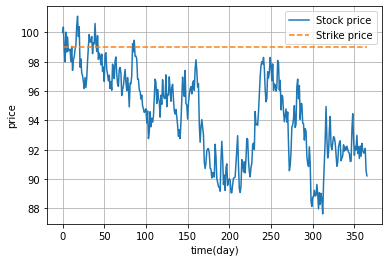

12.640624924851867


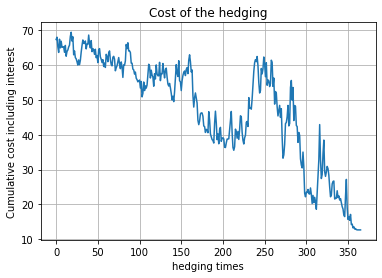

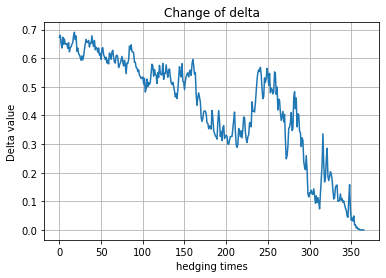

In [9]:
#plot one daily hedging
option_type="call"
T7=1
K7=99
r7=0.06
S7=100
sigma7=0.2
fre=1 #daily hedging

hedgeing_time=np.arange(math.ceil(T7*365*fre)+1)
dday,dowe=onehedge(fre,sigma7,sigma7,T7,r7,K7,S7,"T")

print(dowe[-1])
plt.plot(hedgeing_time,dowe)
plt.title("Cost of the hedging")
plt.xlabel("hedging times")
plt.ylabel("Cumulative cost including interest")
plt.grid()
plt.show()
plt.plot(hedgeing_time,dday)
plt.title("Change of delta")
plt.xlabel("hedging times")
plt.ylabel("Delta value")
plt.grid()
plt.show()

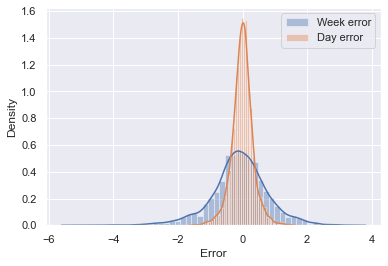

In [10]:
#Repeat the hedging process
repeat=3000
week_error=np.zeros(repeat)
day_error=np.zeros(repeat)

BS_price=BSmodel(S7,K7,T7,r7,sigma7,option_type)
for i in range(repeat):
    week_d,week_o=onehedge(1/7,sigma7,sigma7,T7,r7,K7,S7,"F")
    day_d,day_o=onehedge(1,sigma7,sigma7,T7,r7,K7,S7,"F")
    week_error[i]=BS_price-week_o[-1]*np.exp(-r7*T7)
    day_error[i]=BS_price-day_o[-1]*np.exp(-r7*T7)

#plot the distribution of errors
sns.set() 
sns.distplot(week_error,label='Week error')
sns.distplot(day_error,label='Day error',axlabel='Error')
plt.legend()
plt.ylabel("Density")
plt.show()

[ 4.58187453e+00  3.41175511e+00  1.74862553e+00  1.68506698e-03
 -1.79296788e+00 -3.64727846e+00 -5.49714451e+00]
[ 4.55106243  3.22211752  1.63960644 -0.06796745 -1.90011893 -3.8668314
 -5.78705277]


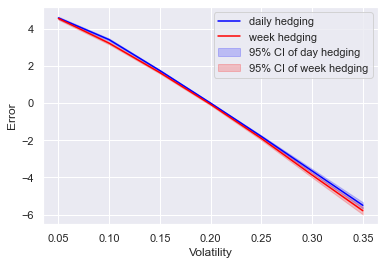

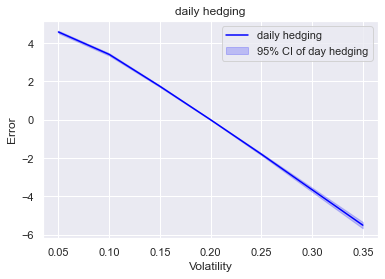

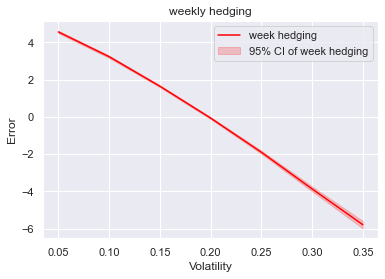

In [11]:
#When the volatility in the stock price don't match the volatility used in delta simulation.

vol_guess=0.2
BS_price=BSmodel(S7,K7,T7,r7,vol_guess,option_type)

vol_stock=np.arange(0.05,0.4,0.05)
repeat=1000

d_error=np.zeros((len(vol_stock),repeat))
w_error=np.zeros((len(vol_stock),repeat))
day_mean=np.zeros(len(vol_stock))
day_upper=np.zeros(len(vol_stock))
day_lower=np.zeros(len(vol_stock))

week_mean=np.zeros(len(vol_stock))
week_upper=np.zeros(len(vol_stock))
week_lower=np.zeros(len(vol_stock))

for i in range(len(vol_stock)):
    for j in range(repeat):
        d_d,d_o=onehedge(1,vol_stock[i],vol_guess,T7,r7,K7,S7,"F")
        d_error[i,j]=BS_price-d_o[-1]*np.exp(-r7*T7)
        w_d,w_o=onehedge(1/7,vol_stock[i],vol_guess,T7,r7,K7,S7,"F")
        w_error[i,j]=BS_price-w_o[-1]*np.exp(-r7*T7)
    day_mean[i]=np.mean(d_error[i])
    day_upper[i]=day_mean[i]+1.96*np.std(d_error[i],ddof=1)/(np.sqrt(len(d_error[i])))
    day_lower[i]=day_mean[i]-1.96*np.std(d_error[i],ddof=1)/(np.sqrt(len(d_error[i])))

    week_mean[i]=np.mean(w_error[i])
    week_upper[i]=week_mean[i]+1.96*np.std(w_error[i],ddof=1)/(np.sqrt(len(w_error[i])))
    week_lower[i]=week_mean[i]-1.96*np.std(w_error[i],ddof=1)/(np.sqrt(len(w_error[i])))


print(day_mean)
print(week_mean)
plt.plot(vol_stock,day_mean,'-', color='blue',label="daily hedging")
plt.fill_between(vol_stock, day_lower,day_upper, color='blue', alpha=0.2,label="95% CI of day hedging")
plt.plot(vol_stock,week_mean,'-', color='red',label="week hedging")
plt.fill_between(vol_stock, week_lower,week_upper, color='red', alpha=0.2,label="95% CI of week hedging")
plt.legend()
plt.xlabel("Volatility")
plt.ylabel("Error")
plt.show()

plt.plot(vol_stock,day_mean,'-', color='blue',label="daily hedging")
plt.fill_between(vol_stock, day_lower,day_upper, color='blue', alpha=0.2,label="95% CI of day hedging")
plt.legend()
plt.xlabel("Volatility")
plt.ylabel("Error")
plt.title("daily hedging")
plt.show()

plt.plot(vol_stock,week_mean,'-', color='red',label="week hedging")
plt.fill_between(vol_stock, week_lower,week_upper, color='red', alpha=0.2,label="95% CI of week hedging")
plt.legend()
plt.xlabel("Volatility")
plt.ylabel("Error")
plt.title("weekly hedging")
plt.show()